### Python数据可视化模块-seaborn
  - matplotlib是python的主要绘图工具，但其自身的语法比较复杂
  - Seaborn是基于matplotlib产生的一个模块，专攻于统计可视化
  - 可以和pandas进行无缝链接，初学者使用Seaborn更容易上手
  - Seaborn和matplotlib的关系类似于pandas和numpy的关系。

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

### 鸢尾花案例

In [43]:
col_names=['sepal_length','sepal_width','petal_length','petal_width','species']
iris=pd.read_csv('iris.txt',names=col_names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.describe()

,sepal_length,sepal_wedth,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 花瓣长宽散点图

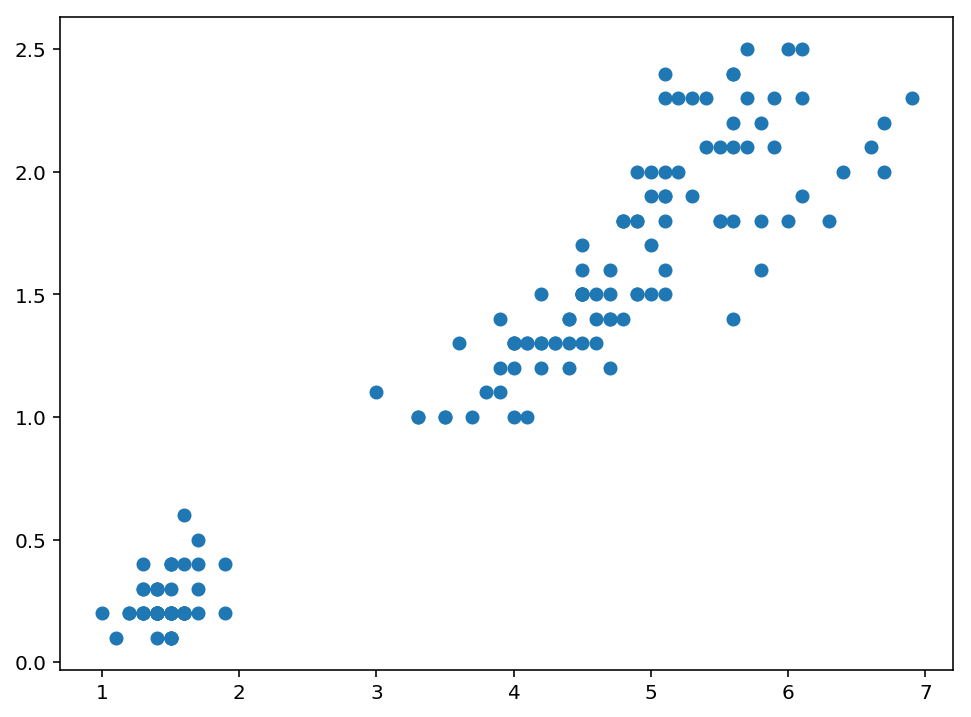

In [15]:
#设置画布大小
plt.figure(figsize=(8,6))
plt.scatter(iris.petal_length,iris.petal_width)

#### 花瓣长宽散点图，以品种划分数据

#### 方法1，先用bool索引分别获取3种花数据集，用plot作图，将三个数据集图放在一张画布上
- 此方法语句复杂，看看下面用seaborn实现的语句

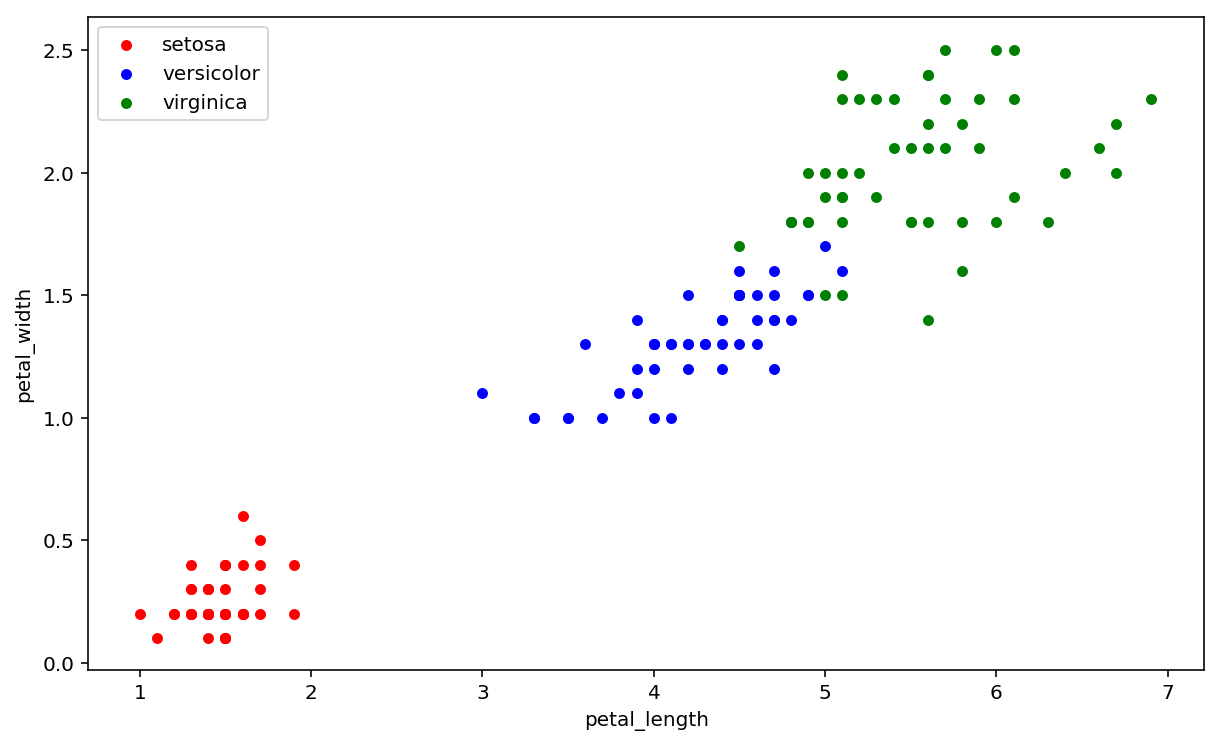

In [17]:
# 使用布尔型索引，分别获取三种类型鸢尾花的数据集
setosa=iris[iris.species=="Iris-setosa"]
versicolor=iris[iris.species=="Iris-versicolor"]
virginica=iris[iris.species=="Iris-virginica"]

#作图，setosa数据散点图ax
ax = setosa.plot(kind="scatter",x="petal_length",y="petal_width",color="red",label="setosa",figsize=(10,6))
#将其余两种类型的花数据也作图在ax上
versicolor.plot(ax=ax,kind="scatter",x="petal_length",y="petal_width",color="blue",label="versicolor")
virginica.plot(ax=ax,kind="scatter",x="petal_length",y="petal_width",color="green",label="virginica")

#### 方法2，seaborn作图，用品种划分数据
   - FacetGrid对象是用来连接pandas DataFrame到一个有着特别结构的matplotlib图像
   - 具体来说，FacetGrid是用来画一组固定的 关系给定的 某个变量的某个值
   - FacetGrid中的hue参数指明划分数据的变量，这里是species（品种）

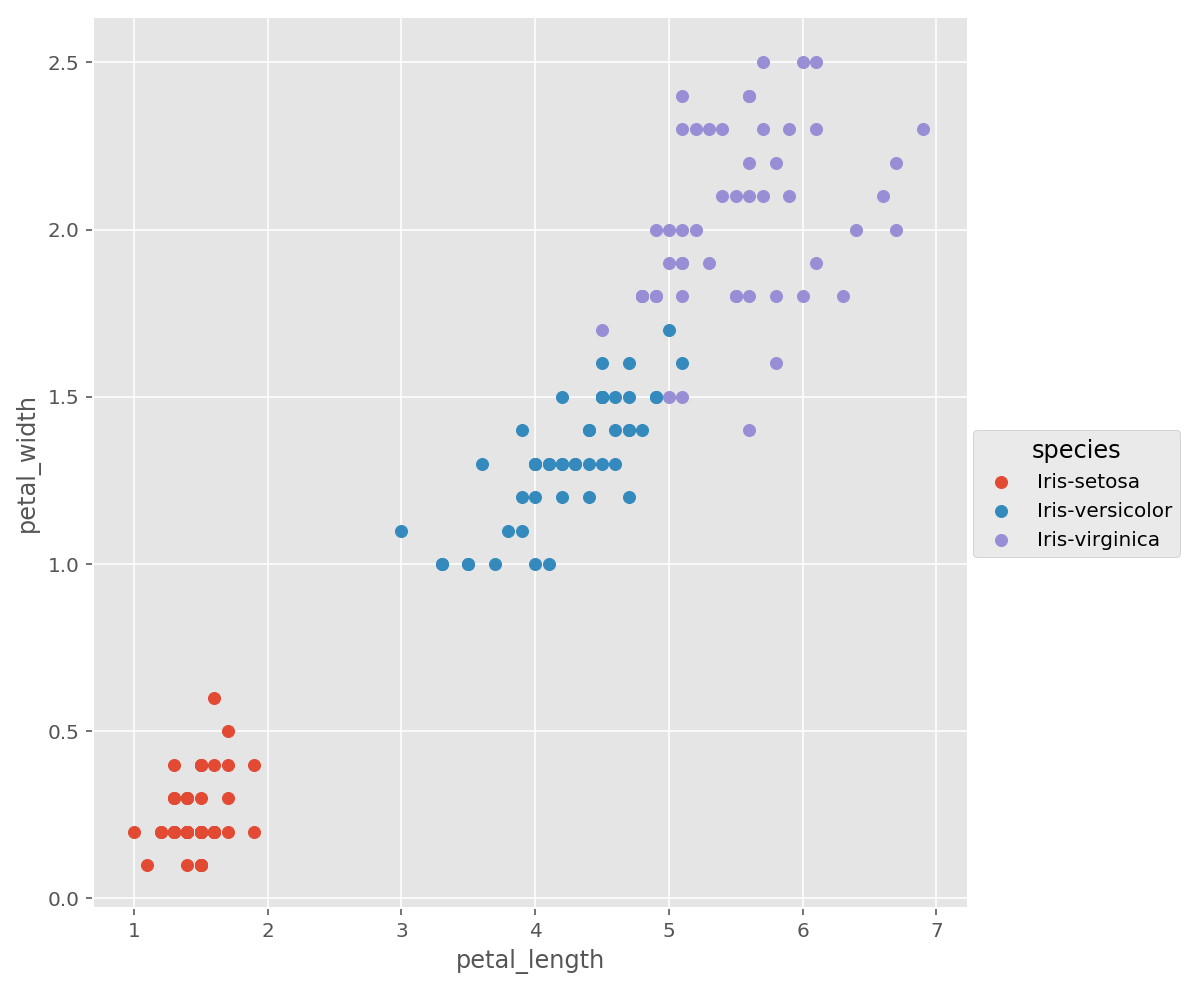

In [54]:
# \ 用于将一行语句提行
# add_legend()添加图例
# hue参数用于指明划分数据的变量
#先将iris数据集以species字段划分开

sns.FacetGrid(iris,hue='species',size=7)\
.map(plt.scatter,'petal_length','petal_width').add_legend()

### 下面的语句真是方便~~

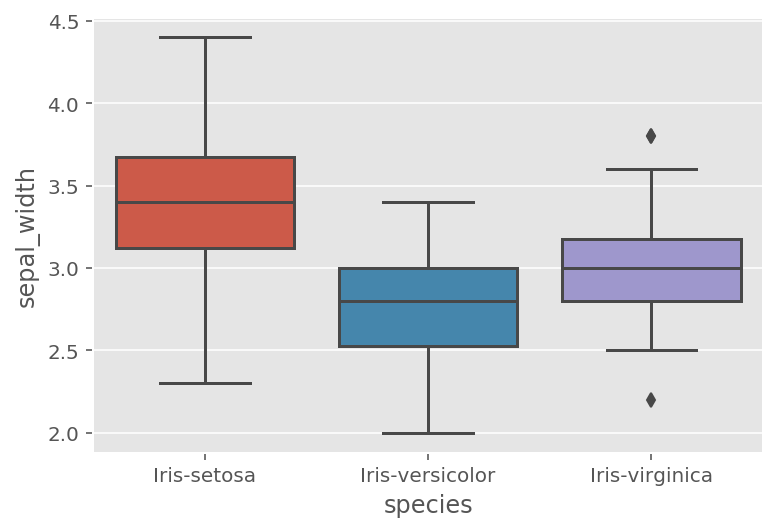

In [48]:
# 花萼宽度箱线图，以品种划分数据
sns.boxplot(data=iris,x='species',y='sepal_width')

### 多变量图
  - sns.pairplot实现
  - 用于快速观察各变量的分布情况，关系等

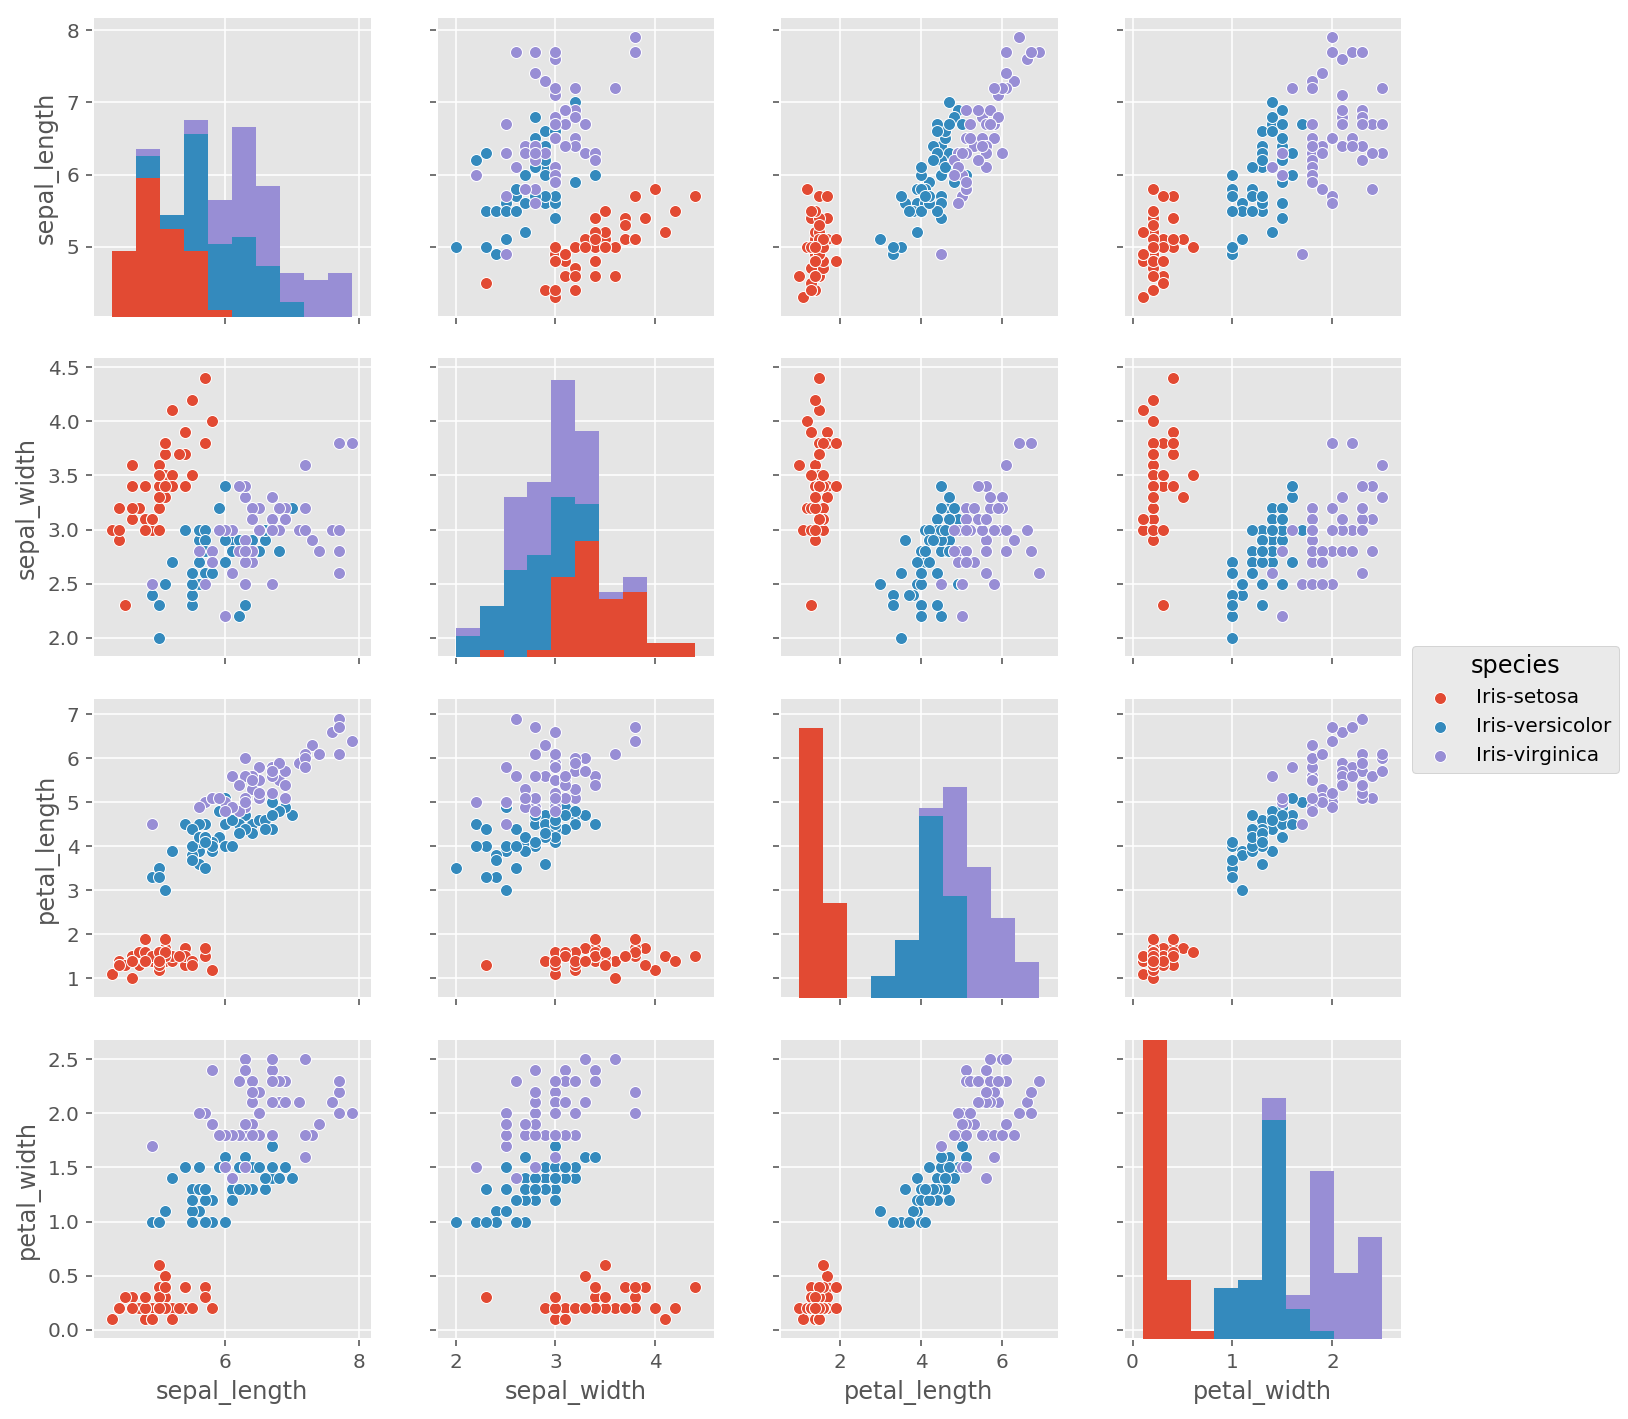

In [47]:
# 一条语句，展现4个变量之间的关系
# 分别展示了4个变量分布的直方图；以及两两变量之间的散点图
sns.pairplot(iris,hue='species')

#### 花萼宽度和长度的散点图，使用品种划分数据

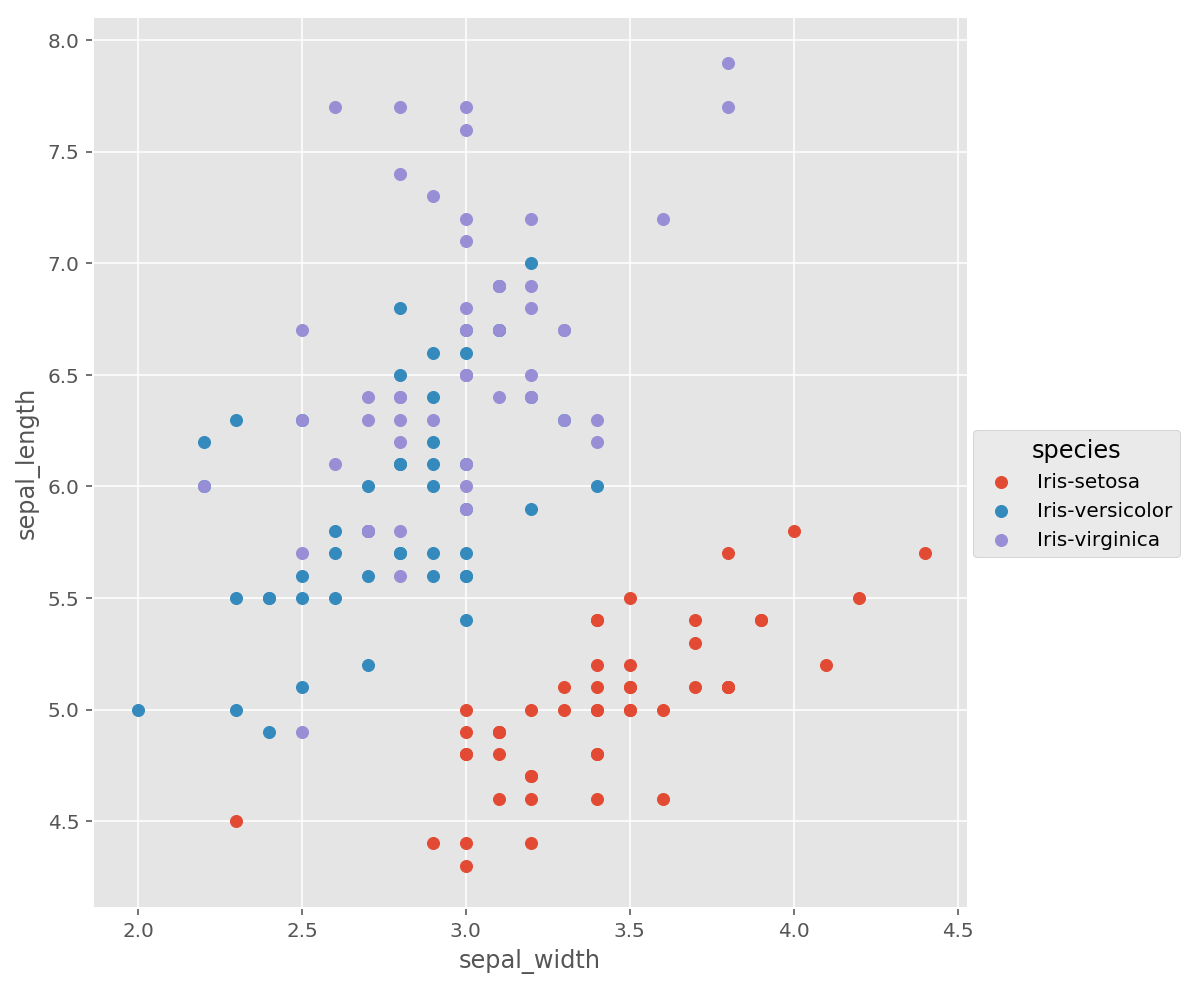

In [57]:
sns.FacetGrid(iris,hue='species',size=7)\
.map(plt.scatter,'sepal_width','sepal_length').add_legend()

#### 花萼的长度的箱线图，使用品种划分数据

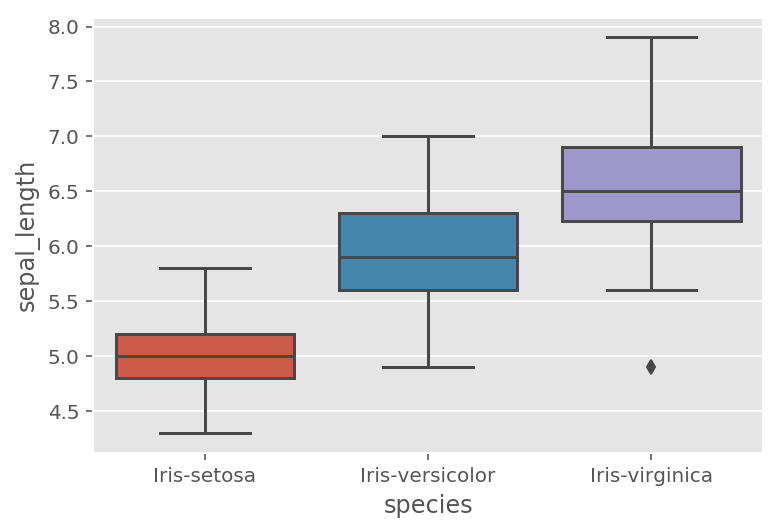

In [58]:
sns.boxplot(data=iris,x='species',y='sepal_length')